In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pathlib import Path




#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
# specs = glob.glob('hst_spectra/*.dat')
# specs

In [3]:
# smooth = 5
# for spec in specs:
#     print(os.path.split(spec)[1])
#     w, f, e = np.loadtxt(spec, unpack=True, usecols=(0,1,2))
#     if 'E140M' not in spec:
#         f = convolve(f,Box1DKernel(smooth))
#         e = convolve(e,Box1DKernel(smooth))/smooth**0.5
#         mask = (w < 1210) | (w > 1220)
#     else:
#         mask = (w > 1160)
#     w, f, e = w[mask], f[mask], e[mask]
#     plt.step(w, f, where='mid')
#     plt.show()

In [4]:
mods = glob.glob('models/*.dk')
mods

['models/PG1224+309_39010-1.dk',
 'models/LM-COM_04010-1.dk',
 'models/WD1458+171_10010.dk',
 'models/WD1339+606_08010.dk',
 'models/WD1436-216_09010.dk',
 'models/EGGR-38_07010.dk',
 'models/WD1504+546_11010.dk',
 'models/DA_EG-UMA.dk',
 'models/LM-COM_04010-2.dk',
 'models/WD0137-349_06010.dk',
 'models/WD2317+268_12010.dk',
 'models/PG1224+309_39010-2.dk',
 'models/UZ-SEX_03010.dk']

In [5]:
import cos_fuv_lsf as lsf

In [6]:
path = '/media/david/2tb_ext_hd/hddata/pcebs/hst/cos/'
x1ds = glob.glob('{}*x1dsum.fits'.format(path))
# x1ds
stars = []
for x in x1ds:
    hdr = fits.getheader(x, 0)
    star = hdr['TARGNAME']
    if star[0] == 'V':
        star = star[2:]
    if star[0:3] == 'WD-':
        star =  star.replace('-', '', 1)
    # print (star)
    if star != 'CC-Cet': #already published
        stars.append(star)
stars = np.unique(stars) 
stars

array(['CC-CET', 'EG-UMA', 'EGGR-38', 'LM-COM', 'UZ-SEX', 'WD0137-349',
       'WD0710+741', 'WD1339+606', 'WD1436-216', 'WD1458+171',
       'WD1504+546', 'WD2256+249', 'WD2257+162', 'WD2317+268'],
      dtype='<U10')

In [7]:
modpath = '/home/david/work/pceb/models/'
for star in stars:
    mod = glob.glob('{}{}*.dk'.format(modpath, star))
    if len(mod) > 0:
        mod = mod[0]
        

UZ-SEX
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc03010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


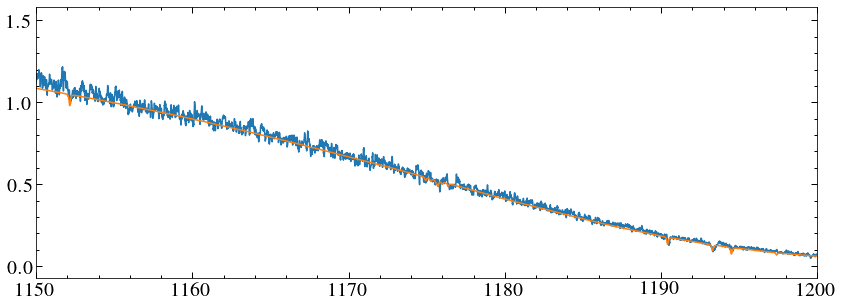

LM-COM
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc04010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


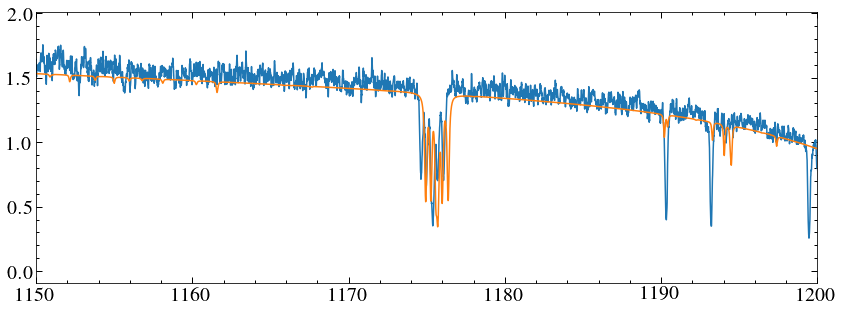

WD0137-349
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc06010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


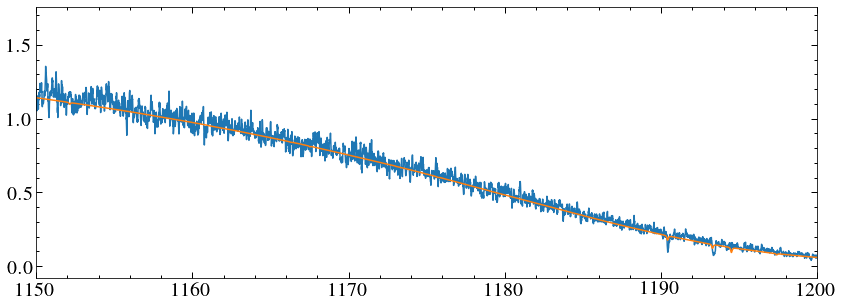

EGGR-38
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc07010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


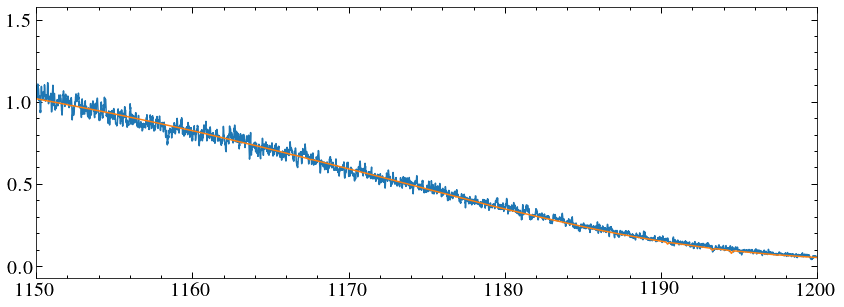

WD1339+606
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc08010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


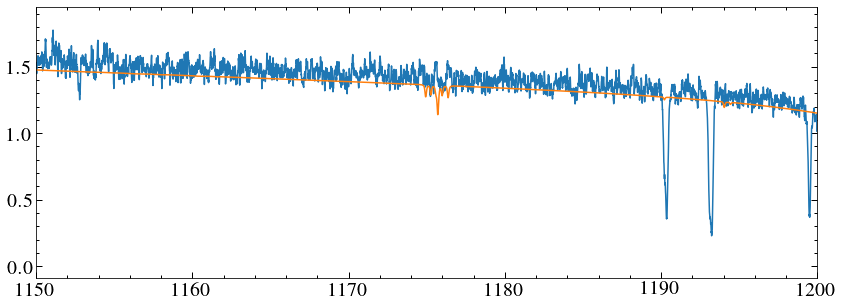

WD1436-216
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc09010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


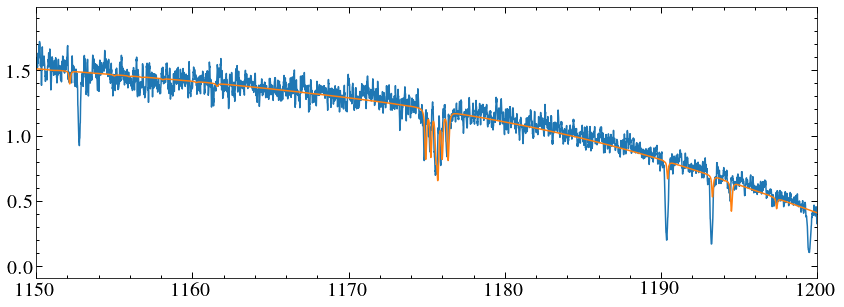

WD1458+171
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc10010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


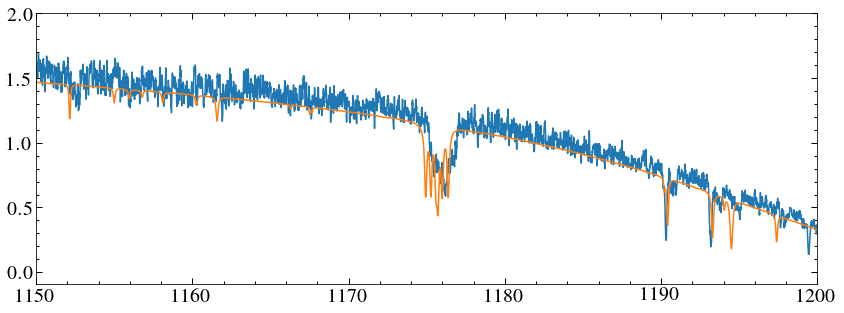

WD1504+546
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc11010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


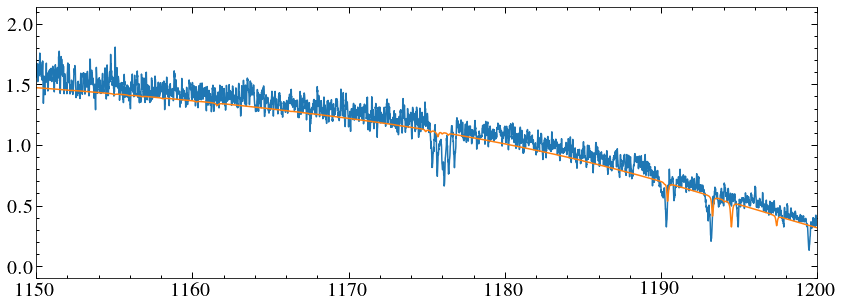

WD2317+268
For the file /media/david/2tb_ext_hd/hddata/pcebs/hst/cos/ldlc12010_x1dsum.fits, the relevant parameters are: 
DETECTOR = FUV
OPT_ELEM = G130M
LIFE_ADJ = 4
CENWAVE = 1291
DISPTAB = 2bj2256ml_disp.fits
Downloaded LSF file to /media/david/2tb_ext_hd/hddata/cos_lsfs/aa_LSFTable_G130M_1291_LP4_cn.dat
Downloaded DISPTAB file to /media/david/2tb_ext_hd/hddata/cos_lsfs/2bj2256ml_disp.fits


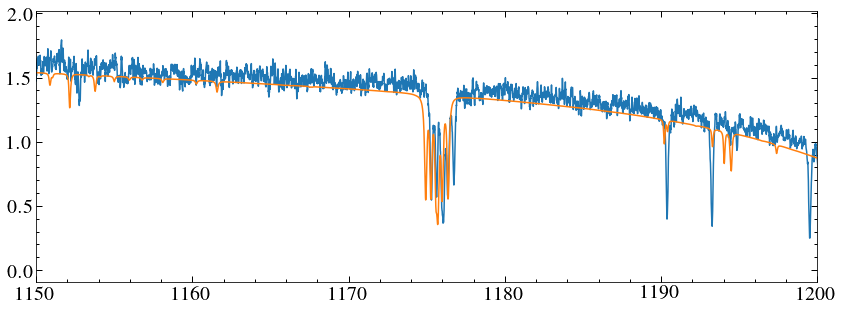

In [21]:
smooth  = 5
for x in x1ds:
    hdr = fits.getheader(x, 0)
    star = hdr['TARGNAME']
    if star[0] == 'V':
        star = star[2:]
    if star[0:3] == 'WD-':
        star =  star.replace('-', '', 1)
    mod = glob.glob('{}{}*.dk'.format(modpath, star))
    if star != 'CC-Cet' and len(mod) > 0: # CC Cet already published
        print(star)
        mod = mod[0]
        mw, mf = np.loadtxt(mod, unpack=True, skiprows= 40 )
        mask = (mw > 1130) & (mw < 1425)
        mw, mf = mw[mask], mf[mask]
        
        datadir = Path('/media/david/2tb_ext_hd/hddata/cos_lsfs')
        LSF_file_name, disptab_path = lsf.get_lsf_file(x, datadir)
        lsfpath = '{}/{}'.format(datadir, LSF_file_name)

        mwc, mfc = lsf.convolve_lsf(mw, mf, 1291, lsfpath, disptab_path, detector="FUV")
        
        wc = np.array([], dtype = float)
        fc = np.array([], dtype = float)
        ec = np.array([], dtype = float)
        data = fits.getdata(x,1)
        for dt in data[::-1]:
            wc = np.concatenate((wc, dt['WAVELENGTH']))
            fc = np.concatenate((fc, dt['FLUX']))
            ec = np.concatenate((ec, dt['ERROR']))
        mask = (wc > 1130) & (wc < 1212) | (wc > 1218) & (wc < 1425)
        wc, fc, ec = wc[mask], fc[mask], ec[mask]
        fc = convolve(fc,Box1DKernel(smooth))
        ec = convolve(ec,Box1DKernel(smooth))/smooth**0.5
    
        plt.plot(wc, fc/np.median(fc))



        # plt.plot(mw, mf/np.median(mf))
        plt.plot(mwc, mfc/np.median(mfc))

        plt.xlim(1150, 1200)
       
        plt.show()
        
